# TAREA 3

### Parte 1

De la base de datos de proyecciones poblacionales de CONAPO, hacer al menos 5 visualizaciones para entender el crecimiento poblacional. Se tienen muchas variables y categorías por explorar, se espera un análisis y contexto de las gráficas así como una interpretación.

In [28]:
datos <- read.csv("pob_mit_proyecciones.csv", header=TRUE, sep=",")
head(datos)

,RENGLON,ANIO,ENTIDAD,GEO,EDAD,SEXO,POBLACION
,<int>,<int>,<fct>,<int>,<int>,<fct>,<int>
1,1,1950,República Mexicana,0,0,Hombres,572103
2,2,1950,República Mexicana,0,0,Mujeres,559162
3,3,1950,República Mexicana,0,1,Hombres,514540
4,4,1950,República Mexicana,0,1,Mujeres,505269
5,5,1950,República Mexicana,0,2,Hombres,478546
6,6,1950,República Mexicana,0,2,Mujeres,469322


In [29]:
summary(datos) #Vemos el resumen de nuestros datos para ver cómo vamos a graficar

    RENGLON            ANIO                     ENTIDAD            GEO       
 Min.   :     1   Min.   :1950   República Mexicana : 22220   Min.   : 0.00  
 1st Qu.:148116   1st Qu.:1989   Aguascalientes     : 17820   1st Qu.: 8.00  
 Median :296230   Median :2010   Baja California    : 17820   Median :16.00  
 Mean   :296230   Mean   :2010   Baja California Sur: 17820   Mean   :15.88  
 3rd Qu.:444345   3rd Qu.:2030   Campeche           : 17820   3rd Qu.:24.00  
 Max.   :592460   Max.   :2050   Chiapas            : 17820   Max.   :32.00  
                                 (Other)            :481140                  
      EDAD            SEXO          POBLACION      
 Min.   :  0.0   Hombres:296230   Min.   :      0  
 1st Qu.: 27.0   Mujeres:296230   1st Qu.:   1353  
 Median : 54.5                    Median :   8429  
 Mean   : 54.5                    Mean   :  31142  
 3rd Qu.: 82.0                    3rd Qu.:  23210  
 Max.   :109.0                    Max.   :1198088  
            

In [5]:
install.packages('gridExtra')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [59]:
library(ggplot2)
library(gridExtra)
library(MASS)

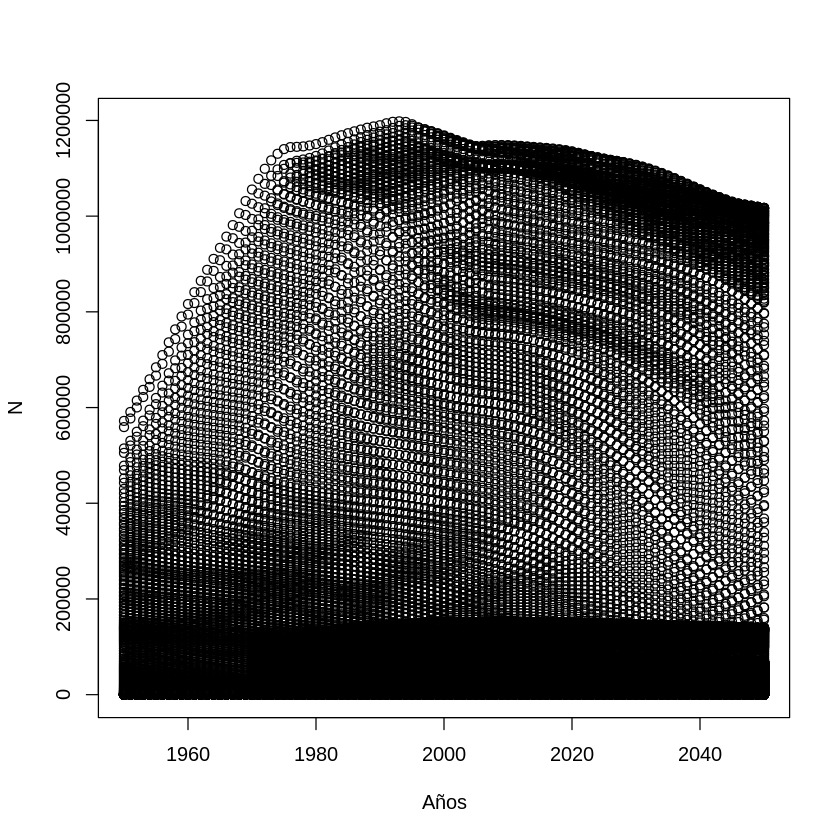

In [27]:
plot(datos$ANIO, datos$POBLACION, xlab = "Años", ylab = "N")

En esta gráfica podemos observar cómo la poblacion crece de una manera acelerada hasta 1980. Después la curva de empieza a achatar y baja después del 200 empieza a reducir la población, aunque no tan acelerado como en el crecimiento de los años anteriores

In [31]:
library(dplyr)


Attaching package: ‘dplyr’


The following object is masked from ‘package:MASS’:

    select


The following object is masked from ‘package:gridExtra’:

    combine


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [56]:
cinc <- filter(datos, ANIO == 1950)
set <- filter(datos, ANIO == 1970)
nov <- filter(datos, ANIO == 1990)
dmc <- filter(datos, ANIO == 2005)
dmv <- filter(datos, ANIO == 2020)
dmcn <- filter(datos, ANIO == 2050)

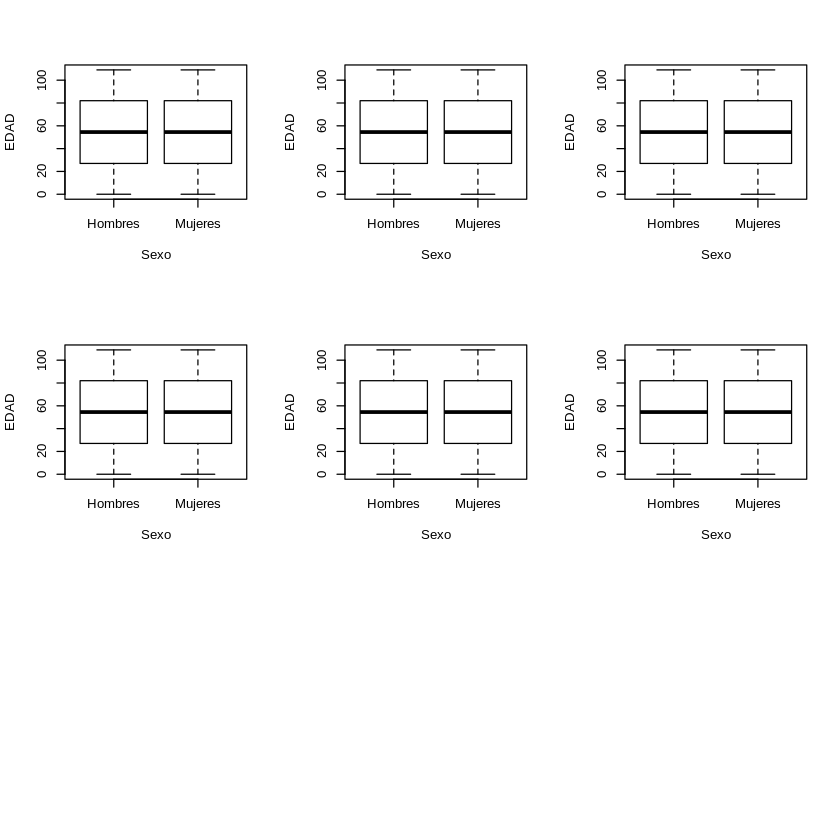

In [75]:
par(mfrow=c(3,3))
plot(cinc$SEXO, cinc$EDAD, xlab = "Sexo", ylab = "EDAD", title="1950") 
plot(set$SEXO, set$EDAD, xlab = "Sexo", ylab = "EDAD")
plot(nov$SEXO, nov$EDAD, xlab = "Sexo", ylab = "EDAD")
plot(dmc$SEXO, dmc$EDAD, xlab = "Sexo", ylab = "EDAD")
plot(dmv$SEXO, dmv$EDAD, xlab = "Sexo", ylab = "EDAD")
plot(dmcn$SEXO, dmcn$EDAD, xlab = "Sexo", ylab = "EDAD")

En estas graficas lo que se intentó hacer fue observar la distribución entre las edades y el sexo, principalmente para ver en qué año morían más, habían más adultos o más niños. Definitivamente no hay una conclusión clara, ya que a pesar de que se hizo el filtro para calcular cada 20 el cambio poblacional, los datos son muy parecidos

Warning message:
“Removed 100 rows containing missing values (geom_point).”
Warning message:
“Removed 128 rows containing missing values (geom_point).”


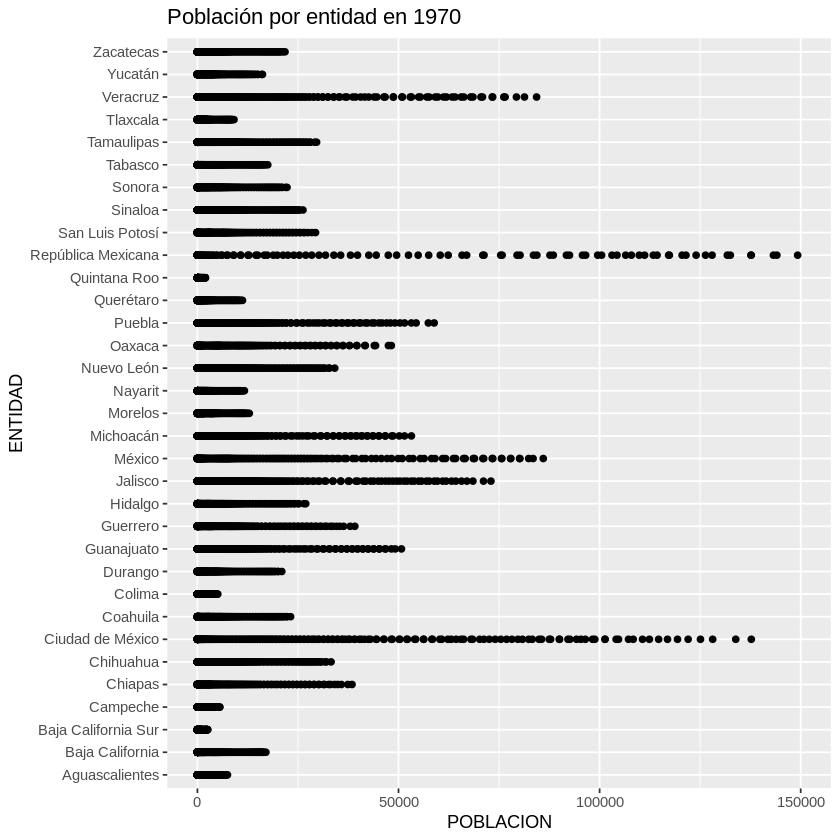

Warning message:
“Removed 144 rows containing missing values (geom_point).”


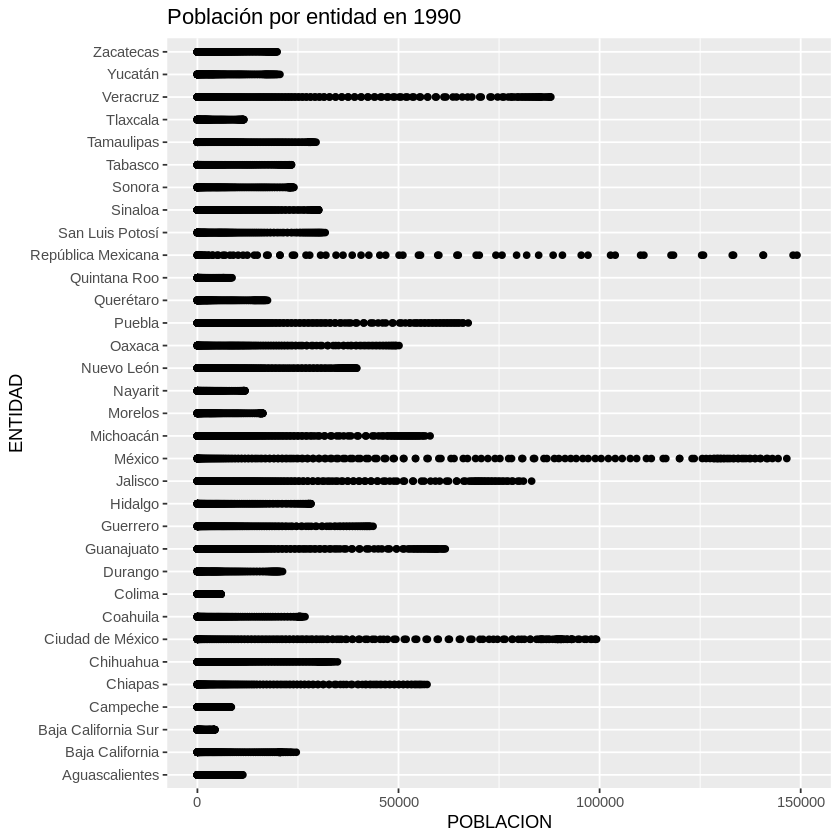

Warning message:
“Removed 157 rows containing missing values (geom_point).”


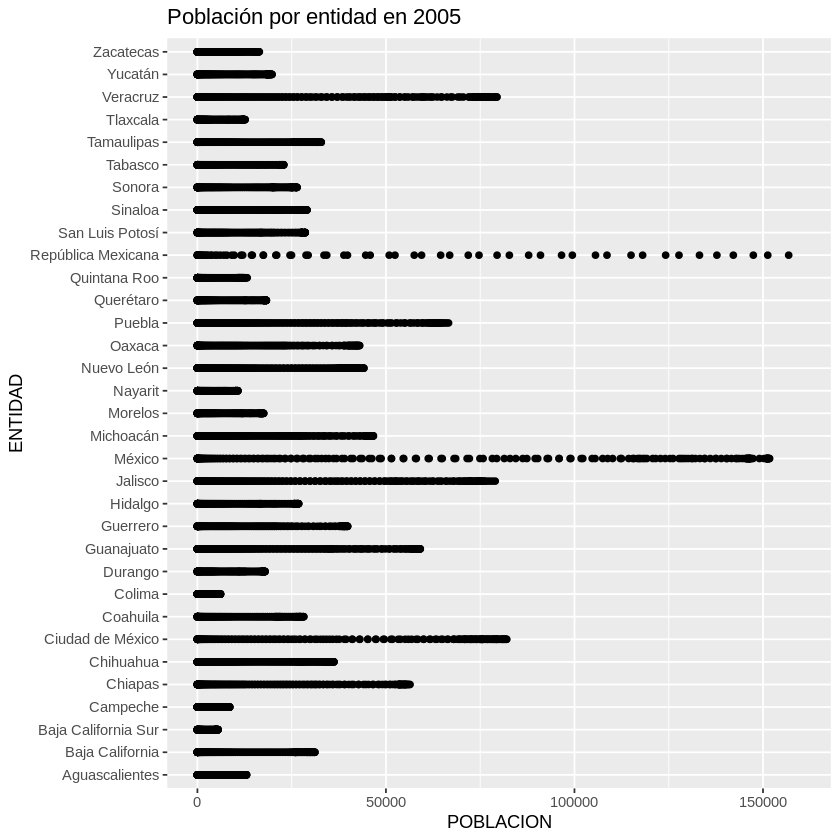

Warning message:
“Removed 179 rows containing missing values (geom_point).”


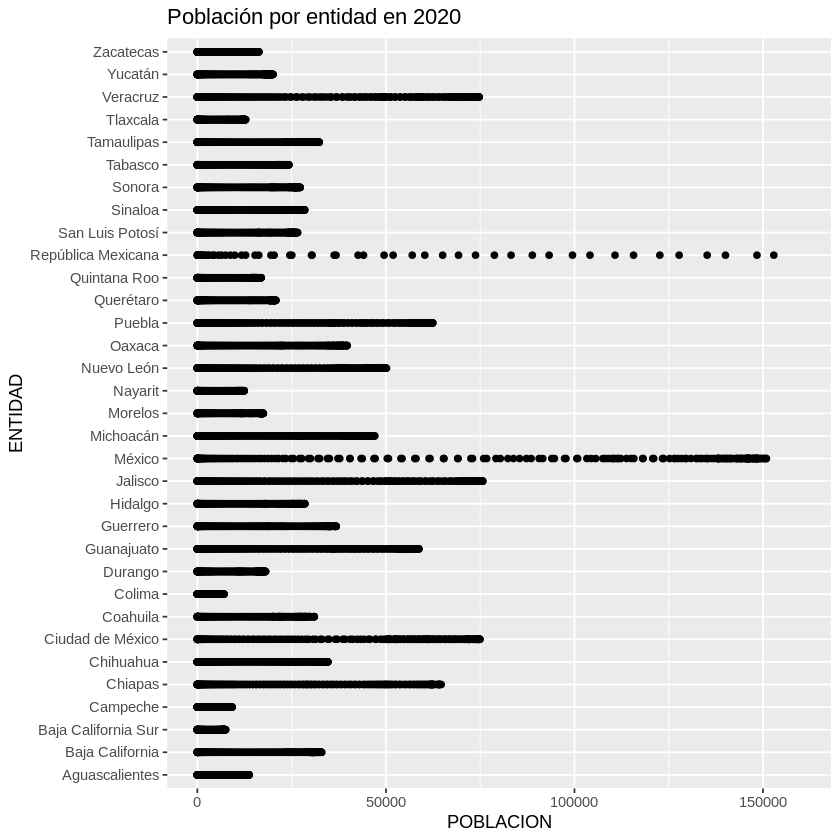

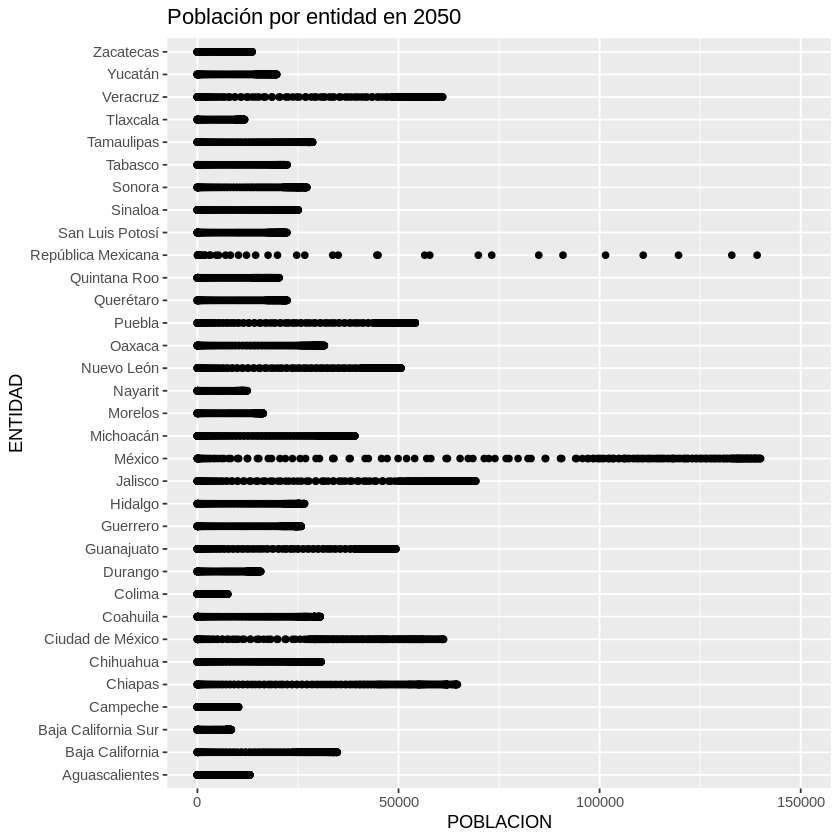

In [97]:
par(mfrow=c(2,4))
ggplot(set, aes(POBLACION, ENTIDAD)) + geom_point() +
       ggtitle("Población por entidad en 1970") +xlim(0,150000)
ggplot(nov, aes(POBLACION, ENTIDAD)) + geom_point() +
       ggtitle("Población por entidad en 1990") +xlim(0,150000)
ggplot(dmc, aes(POBLACION, ENTIDAD)) + geom_point() +
       ggtitle("Población por entidad en 2005") +xlim(0,160000)
ggplot(dmv, aes(POBLACION, ENTIDAD)) + geom_point() +
       ggtitle("Población por entidad en 2020") +xlim(0,160000)
ggplot(dmcn, aes(POBLACION, ENTIDAD)) + geom_point() +
       ggtitle("Población por entidad en 2050") +xlim(0,150000)

Con este gráfico se pretendió analizar el cambio poblacional de cada 20 años empezando por 1970. Vemos que al principio la Ciudad de México era la entidad más poblada. Después el Estado de México comenzó a crecer mucho más. En la última gráfica podemos apreciar cómo disminiuye la población de 2020 a 2050.

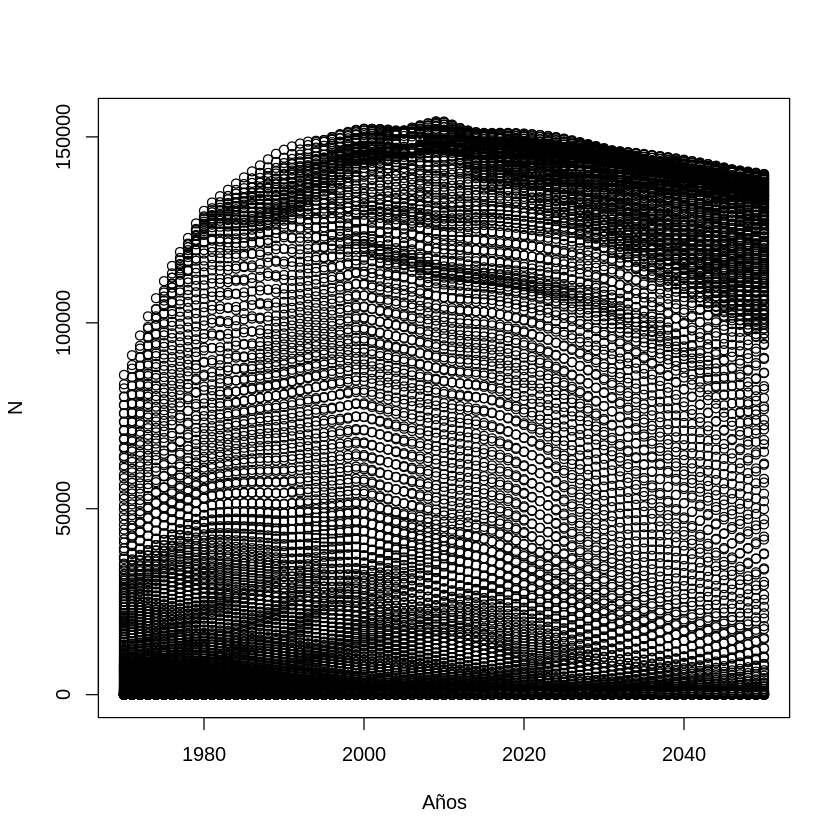

In [126]:
EdoMex <- filter(datos, ENTIDAD == "México")
plot(EdoMex$ANIO, EdoMex$POBLACION, xlab = "Años", ylab = "N")

Podemos observar que la gráfica es muy parecida a la primera. Esta gráfica corresponde solamente a la observación del crecimiento población en el Estado de México. Decidí tomar esa entidad ya que es la que tuvo mayor crecimiento y por lo tanto es posible que se vean mejor los resultados

In [147]:
EdoMex2 <- filter(EdoMex, ANIO == 2050)

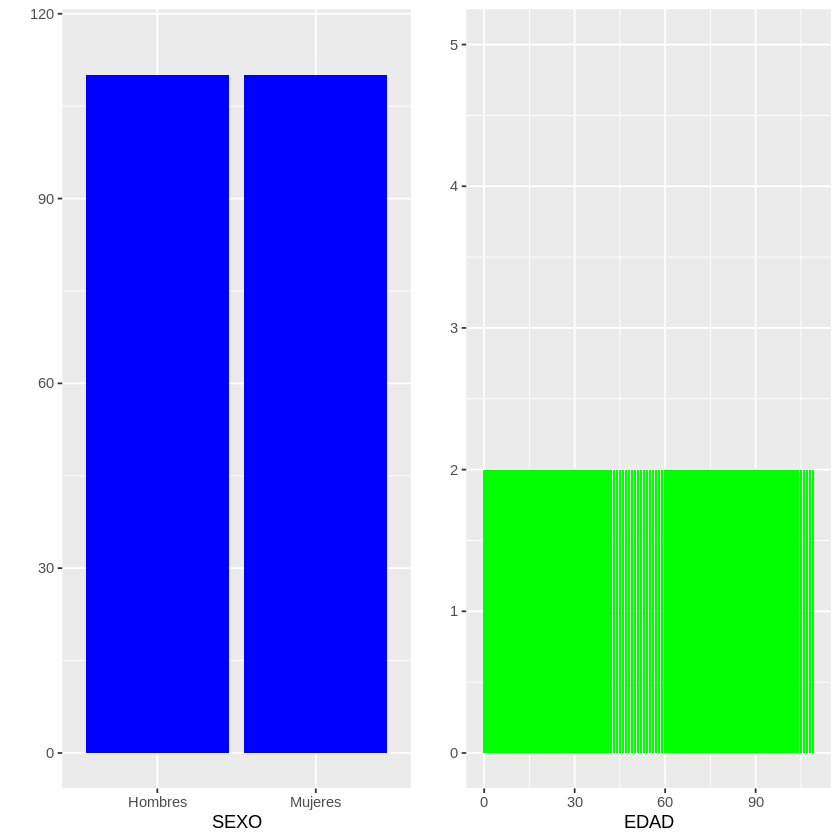

In [151]:
p <- ggplot(EdoMex2, aes()) +
            ylab("") 
cs <- p + aes(SEXO) + geom_bar(fill="blue") + ylim(0,115)
sx <- p + aes(EDAD) + geom_bar(fill="green") + ylim(0,5)
grid.arrange(cs, sx, nrow=1)

Conclusiones:
Podemos observar que efectivamente hubo un crecimiento muy fuerte de la población en los últimos 50 años del siglo pasado. Después vemos que en este nuevo milenio la curva deja de crecer y empeiza a bajar poco a poco. En los datos se tiene la misma cantidad de hombres que de mujeres, es por ello que las gráficas se ven de esa manera, ya que los datos tienen las mismas cantidades. Para 2050 no habrá una decaída de la población drástica, será lenta 